In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes Classifiers

1. They are called naive because they assume that features are conditionally independent, given the class
2. In other words, they assume that, for all instances of a given class the feature have little/no corelation with each other.
3. Highly efficient learning and prediction.
4. But generalization performance may worse than more sophisticated learning models.

## Classifier Types
1. Bernoulli: Binary features (example: word presence/absence)
2. Multinomial: discrete features (example: word count)
3. Gaussian: continuous/real valued, uses mean and standard deviation.


 ### Gaussian:
 1. Gaussian Naive Bayes Classifier assumes that the data for each class was generated by a simple class specific Gaussian distribution.
 2. Predicting the class of a new data point corresponds mathematically to estimating the probability that each classes Gaussian distribution was most likely to have generated the data point. Classifier then picks the class that has the highest probability.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(r'D:\Coursera Data Science\Course 3'))

In [4]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1

X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

# synthetic dataset for classification (binary)

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

D:\Coursera Data Science\Course 3\adspy_shared_utilities.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  crime = crime.ix[:,columns_to_keep].dropna()
D:\ML_Workshop\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
D:\Coursera Data Science\Course 3\adspy_shared_utilities.py:24: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  

# Examples of NBCLF

<IPython.core.display.Javascript object>


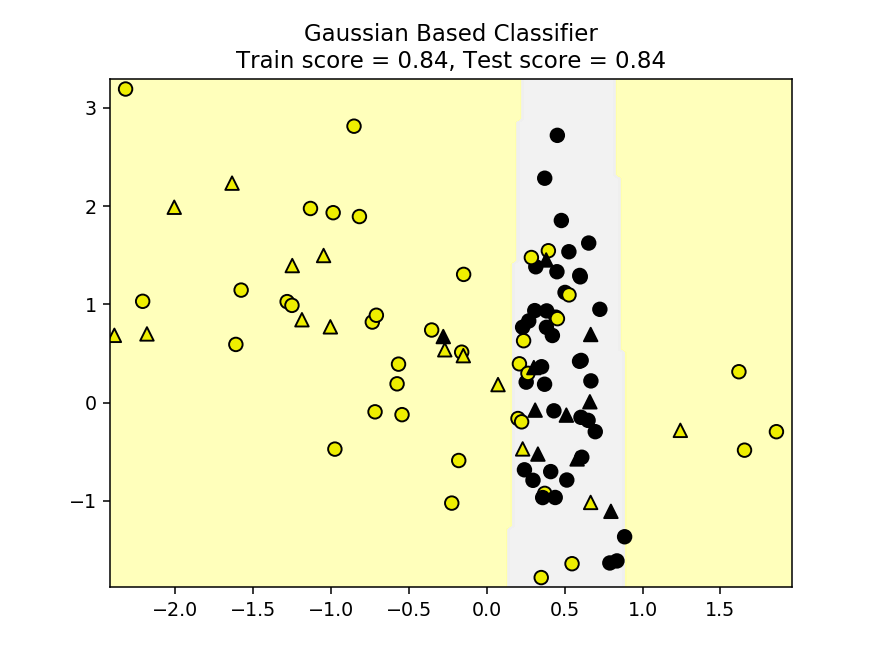

In [6]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0) 

md = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(md, X_train, y_train, X_test, y_test, 'Gaussian Based Classifier')

In [8]:
# example on breast cancer dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
md = GaussianNB().fit(X_train, y_train)
print('Training :', md.score(X_train, y_train))
print('Testing :', md.score(X_test, y_test))

Training : 0.950704225352
Testing : 0.937062937063


# Pros and cons

## Pros
1. Easy to understand
2. Simple, efficient parameter estimation
3. Works well with high dimensional data
4. used as baseline comparision against more sophisticated methods.

## Cons
1. Assumption that features are conditionally independent given the class is not realistic.
2. other classifiers have better generalization performance.
3. confidence estimates are not very much accurate

# Random Forest
1. An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models .
2. Random forest is one of the example.
3. They are ensemble of trees.
4. widely used, good results on many problems.
5. one decision trree is prone to overfitting and many of them gives a better generalization.
6. they should be diverse in nature and introduce random variation into tree-building

# How random variation is done?
This random variation during tree building happens in two ways. First, the data used to build each tree is selected randomly and second, the features chosen in each split tests are also randomly selected. To create a random forest model you first decide on how many trees to build. This is set using the n_estimated parameter for both RandomForestClassifier and RandomForestRegressor. Each tree were built from a different random sample of the data called the bootstrap sample. Bootstrap samples are commonly used in statistics and machine learning. If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random with replacement, that is, allowing for the possibility of picking the same row again at each selection. You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement. When building a decision tree for a random forest, the process is almost the same as for a standard decision tree but with one important difference. When picking the best split for a node, instead of finding the best split across all possible features, a random subset of features is chosen and the best split is found within that smaller subset of features. The number of features in the subset that are randomly considered at each stage is controlled by the max_features parameter. This randomness in selecting the bootstrap sample to train an individual tree in a forest ensemble, combined with the fact that splitting a node in the tree is restricted to random subsets of the features of the split, virtually guarantees that all of the decision trees and the random forest will be different. 

1. Random forest model is sensitive to max_feature parameter
2. If equal to 1 leads to forests with diverse complex features.
3. If set to number close to total number of features lead to similar forests with simple trees.

## Prediction
1. Make prediction for every tree in the forest
2. For regression, mean of individual tree predictions.
3. For classification, each tree gives probability for each class. Probabilities averaged across trees. Predict the class with highest probability.

<IPython.core.display.Javascript object>


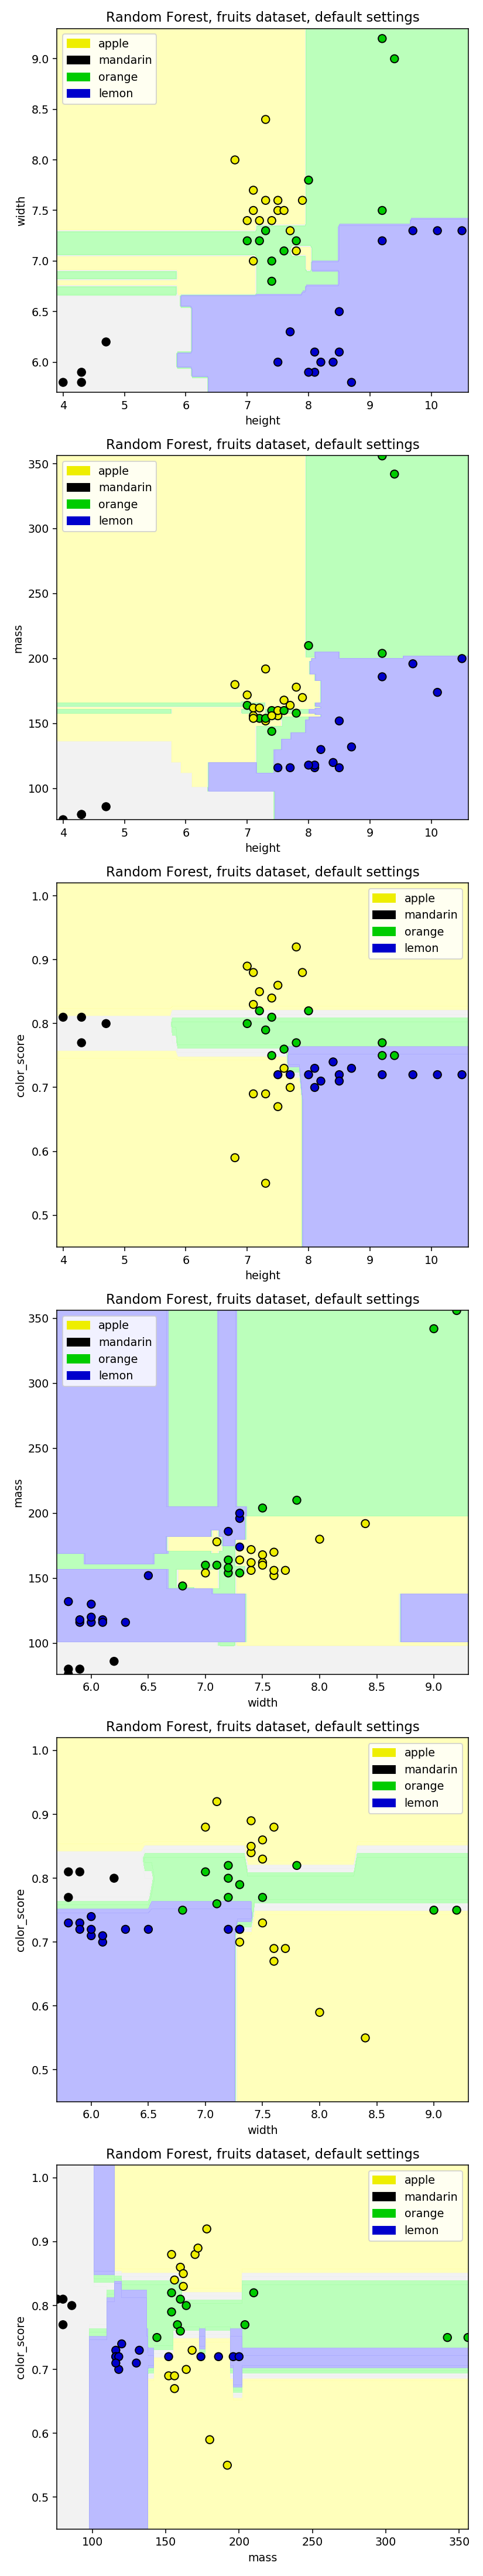

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [9]:
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruits.values, random_state=0)

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [14]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


## Pros and Cons

### Pros
1. Widely used, excellent preformance on many problems
2. Doesn't require careful normalisation of features or extensive parameter tuning.
3. Like decision trees, handles a mixture of feature types
4. Easily parallelized across multiple CPUs.


### Cons
1. The resulting models are difficult to interpret
2. Like decision trees, they may not be suitable for high-dimensional tasks.

## Key parameters
1. n_estimators: number of trees. Should be larger for larger datasets to reduce overfitting.
2. max_features: has a strong effect on performance. Influence the diversity of the trees in the forest.
3. max_depth: controls the depth of each tree.
4. n_jobs: How many cores to use in parallel during training.

# Gradient Boosted Decision Trees

1. Like random forest, gradient boosted trees used an ensemble of multiple tress to create more powerful prediction models for classification and regression.
2. It builds the subsequent trees in series rather than parallel  building. It attempts to correct the mistakes if the previous tree in the series.
3. It uses series of shallow trees known as weak learners build in non random way. 
4. It makes process fast and uses less memory.
5. Here a new parameter is Learning rate. It controls how hard each new tree tries to correct reamining mistakes from previous round. High lr results in complex trees and low lr in simple trees.

<IPython.core.display.Javascript object>


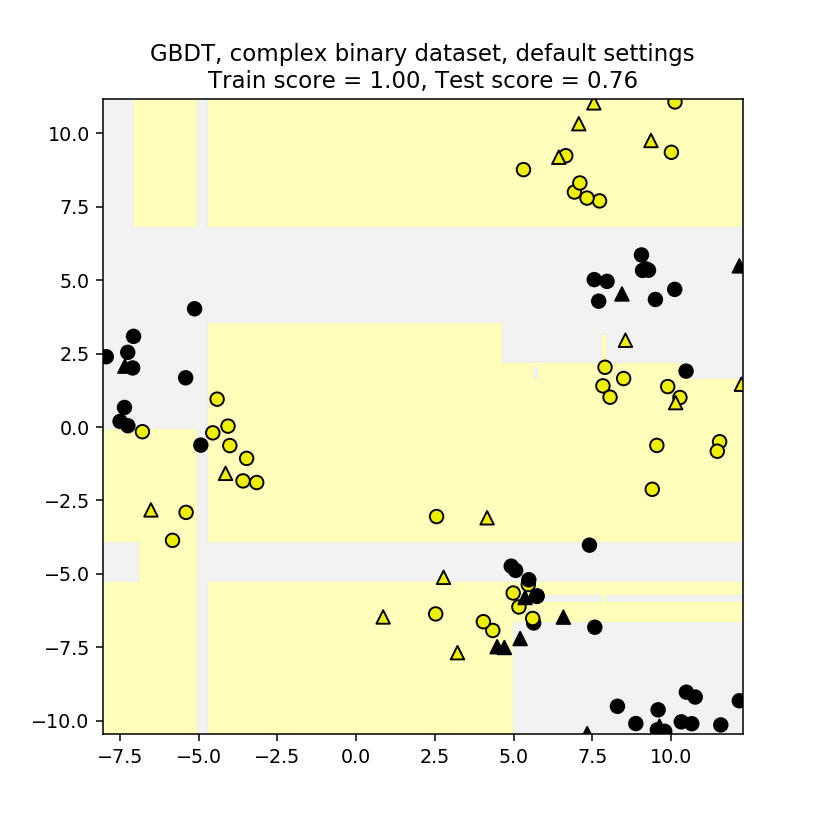

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


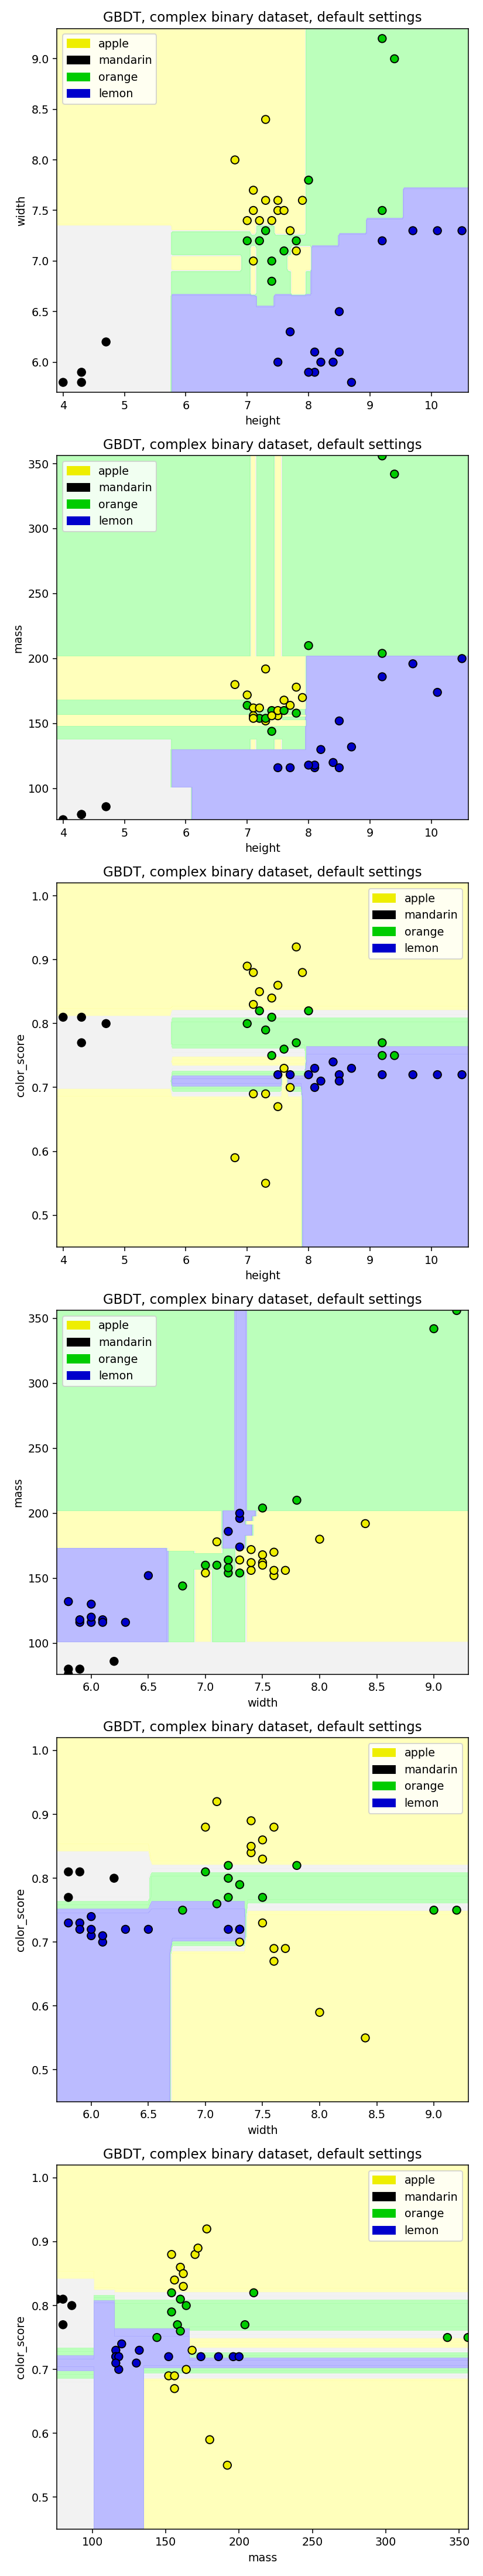

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


## Pros and cons

## Pros
1. Often the best accuracy on many problems.
2. model prediction requires only the modest memory and is fast.
3. Doesn't require normalization of features to perform well.
4. can handle a mixture of feature types.

## Cons
1. Often difficult to interpret by humans.
2. requies careful tuning of learing rate and other parameters.
3. Training can take significant time.
4. Not recommended for text classification and other high dimensional sparse features.

# Neural Networks

<IPython.core.display.Javascript object>


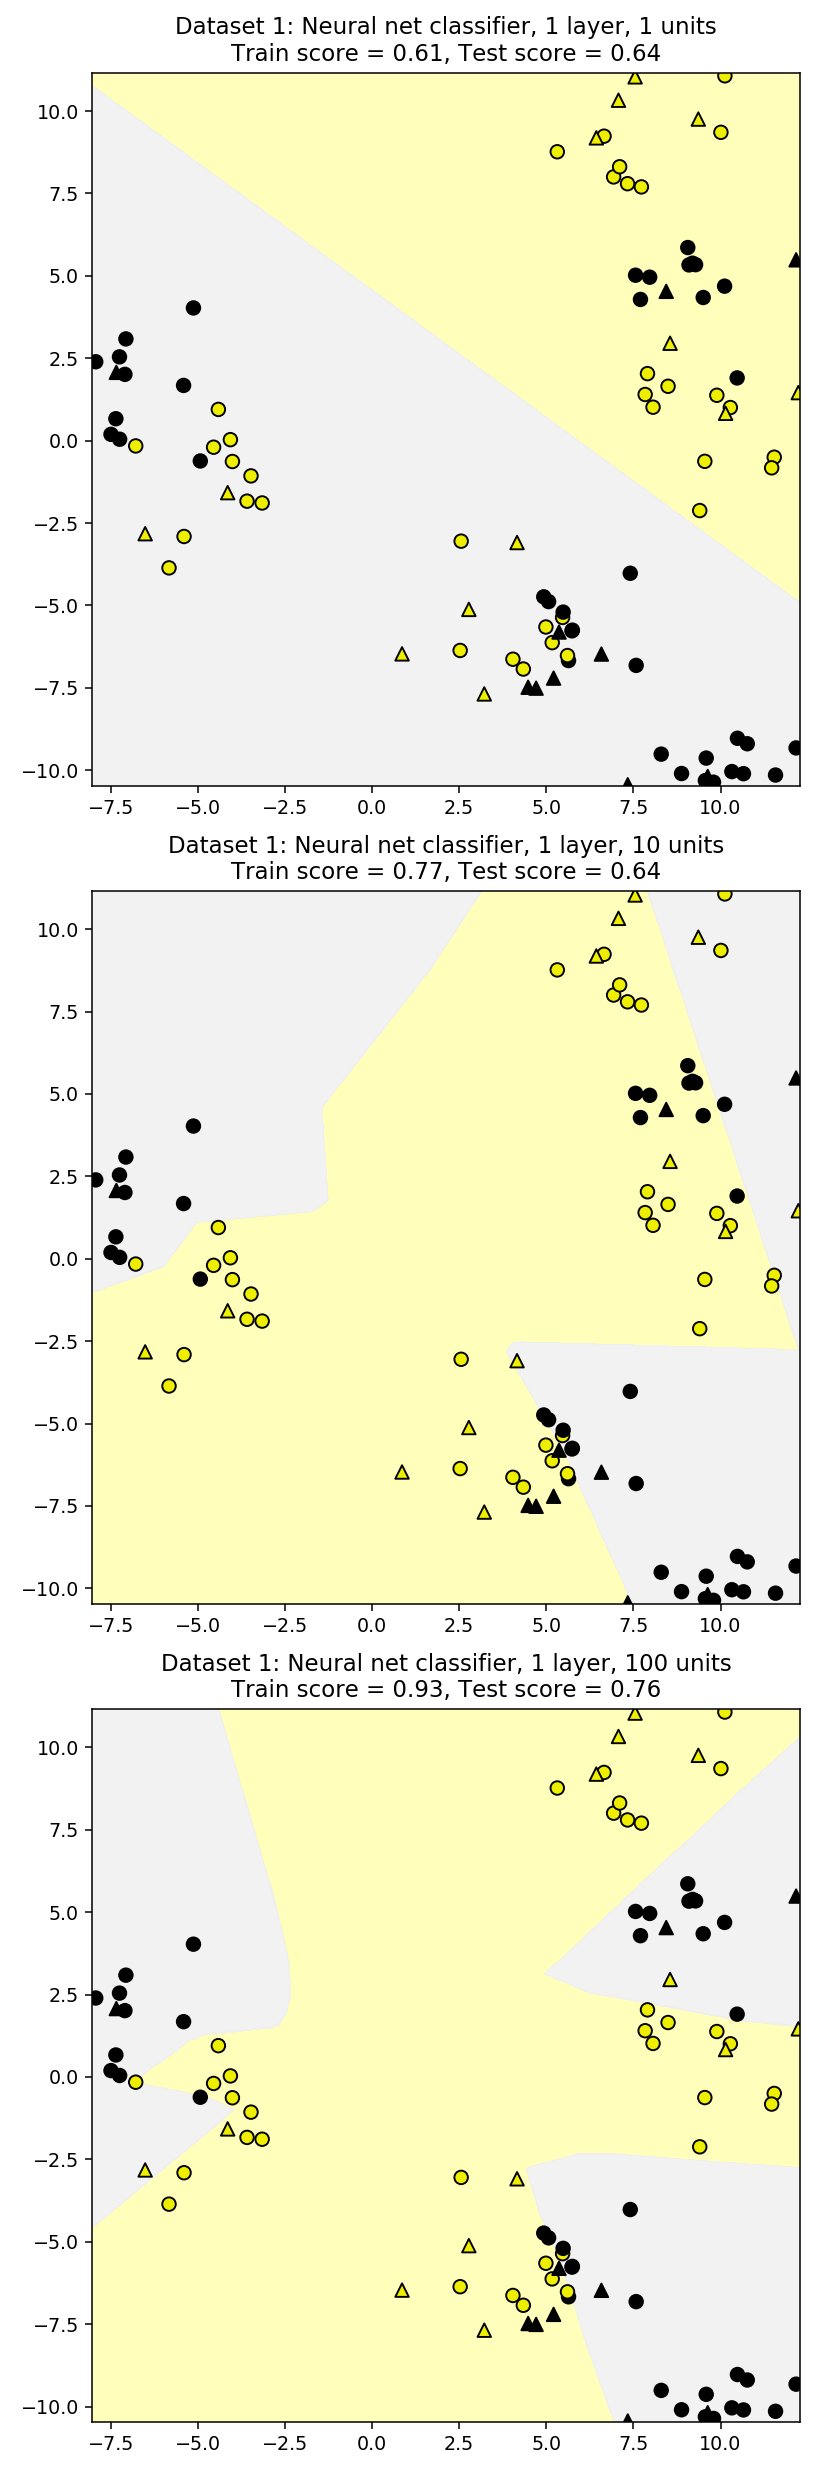

In [18]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

<IPython.core.display.Javascript object>


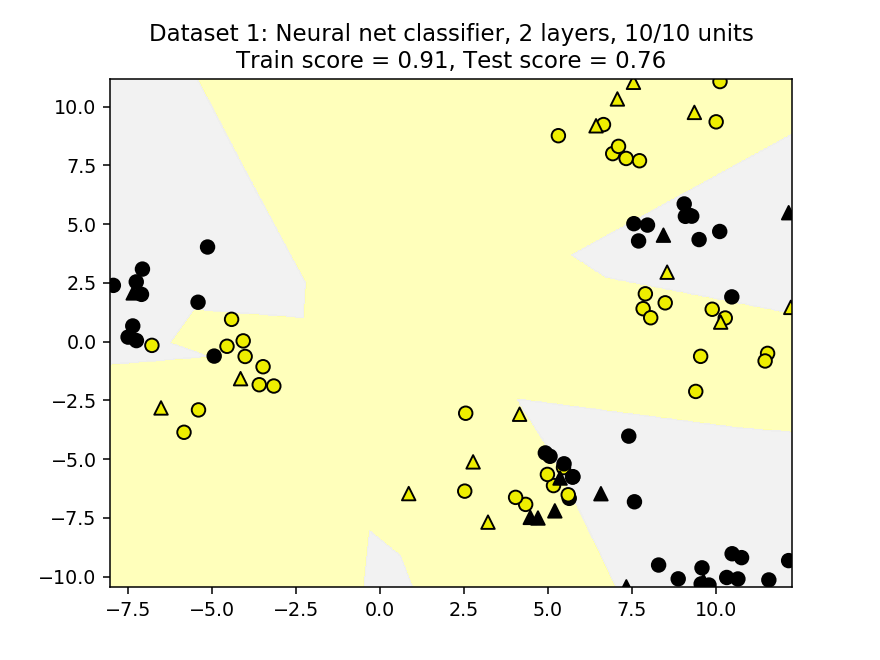

In [19]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


The effect of regularization parameter alpha in the MLP in to constrain the regressor to use simple and simpler models with fewer larger weights. 

# Solver

Solver is the algorithm that actually does the numerical work of finding the optimal weights. And one intuitive way of visualizing this process. Is that all of the solver algorithms have to do a kind of hill-climbing in a very bumpy landscape, with lots of local minima. Where each local minimum corresponds to a locally optimal set of weights. That is, a choice of weight setting that's better than any nearby choices of weights. So across this whole landscape of very bumpy local minima. Some will have higher validation scores on the test data, and some will have lower. So depending on the initial random initialization of the weights. And the nature of the trajectory in the search path that a solver takes through this bumpy landscape. The solver can end up at different local minima, which can have different validation scores. The default solver, adam, tends to be both efficient and effective on large data sets, with thousands of training examples. For small data sets, like many of the ones we use in these examples, the lbfgs solver tends to be faster, and find more effective weights.